<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


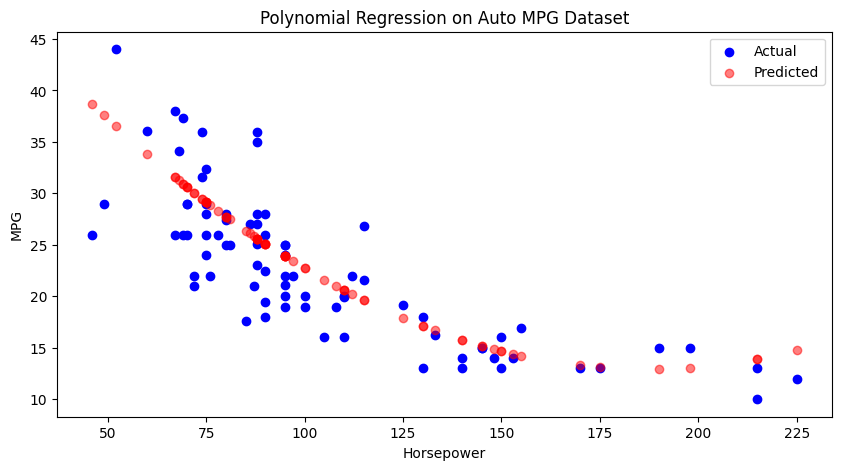

Polynomial Regression MSE (Auto MPG): 18.416967796017616
Polynomial Regression R2 Score (Auto MPG): 0.6391701147013347


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Load Auto MPG Dataset for Polynomial Regression
auto_mpg_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

auto_mpg = pd.read_csv(auto_mpg_url, sep='\s+', names=columns, na_values='?')

auto_mpg.head()

auto_mpg.info()

auto_mpg = auto_mpg.dropna()

# Select horsepower as independent variable and mpg as dependent variable
X_auto = auto_mpg[['horsepower']].astype(float)
y_auto = auto_mpg['mpg']

# Split into training and test sets
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

# Apply Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_auto_poly = poly.fit_transform(X_train_auto)
X_test_auto_poly = poly.transform(X_test_auto)

poly_reg = LinearRegression()
poly_reg.fit(X_train_auto_poly, y_train_auto)
y_pred_auto = poly_reg.predict(X_test_auto_poly)

# Plot Polynomial Regression results
plt.figure(figsize=(10, 5))
plt.scatter(X_test_auto, y_test_auto, color='blue', label='Actual')
plt.scatter(X_test_auto, y_pred_auto, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression on Auto MPG Dataset')
plt.legend()
plt.show()

print("Polynomial Regression MSE (Auto MPG):", mean_squared_error(y_test_auto, y_pred_auto))

print("Polynomial Regression R2 Score (Auto MPG):", r2_score(y_test_auto, y_pred_auto))
